In [1]:
import numpy as np
import json
from matplotlib import pyplot as plt
from scipy.signal import welch
import os

In [33]:
folder = r"C:\Users\aless\Desktop\dataset_AI_stablepower\small_experiments\confronto_spettri_gen_OOS\spettri"
data_g5oos_low_h_pre = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_g5oos_low_inertia_pre_step.npz'), allow_pickle = True)
data_g5oos_low_h_post = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_g5oos_low_inertia_post_step.npz'), allow_pickle = True)
data_norm_low_h_pre = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_low_inertia_pre_step.npz'), allow_pickle = True)
data_norm_low_h_post = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_low_inertia_post_step.npz'), allow_pickle = True)


data_g5oos_pre = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_g5oos_pre_step.npz'), allow_pickle = True)
data_g5oos_post = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_g5oos_post_step.npz'), allow_pickle = True)
data_norm_pre = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_pre_step.npz'), allow_pickle = True)
data_norm_post = np.load(os.path.join(folder, 'IEEE39_AC_config_grid_former_reali_post_step.npz'), allow_pickle = True)

In [8]:
data_norm_low_h_pre['TF'].shape

(2, 401, 10)

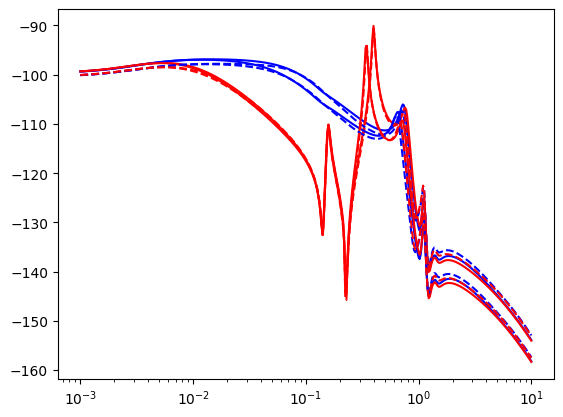

In [34]:
plt.semilogx(data_g5oos_low_h_pre['F'], 20*np.log10(np.abs(data_g5oos_low_h_pre['TF'][0,:,0])), color = 'b')
plt.semilogx(data_g5oos_low_h_post['F'], 20*np.log10(np.abs(data_g5oos_low_h_post['TF'][0,:,0])), color = 'r')

plt.semilogx(data_norm_low_h_pre['F'], 20*np.log10(np.abs(data_norm_low_h_pre['TF'][0,:,0])), linestyle = '--', color = 'b')
plt.semilogx(data_norm_low_h_post['F'], 20*np.log10(np.abs(data_norm_low_h_post['TF'][0,:,0])), linestyle = '--', color = 'r')


# plt.semilogx(data_g5oos_pre['F'], 20*np.log10(np.abs(data_g5oos_pre['TF'][0,:,0])), color = 'b')
# plt.semilogx(data_g5oos_post['F'], 20*np.log10(np.abs(data_g5oos_post['TF'][0,:,0])), color = 'r')

# plt.semilogx(data_norm_pre['F'], 20*np.log10(np.abs(data_norm_pre['TF'][0,:,0])), linestyle = '--', color = 'b')
# plt.semilogx(data_norm_post['F'], 20*np.log10(np.abs(data_norm_post['TF'][0,:,0])), linestyle = '--', color = 'r')

(-5e-06, 1e-05)

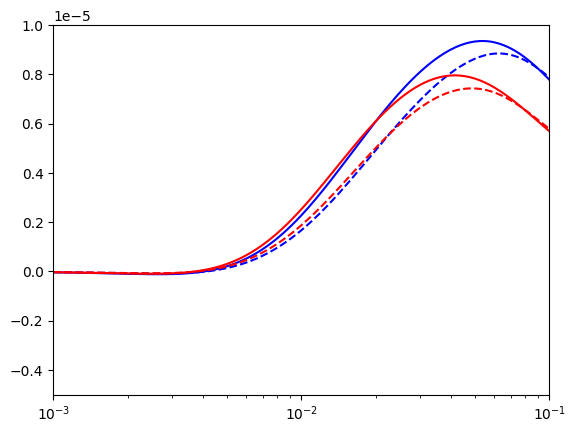

In [53]:
plt.semilogx(data_g5oos_low_h_pre['F'], np.abs(data_g5oos_low_h_pre['TF'][0,:,0]) - np.abs(data_g5oos_low_h_post['TF'][0,:,0]), '-b')
plt.semilogx(data_norm_low_h_pre['F'], np.abs(data_norm_low_h_pre['TF'][0,:,0]) - np.abs(data_norm_low_h_post['TF'][0,:,0]), '--b')

plt.semilogx(data_g5oos_pre['F'], np.abs(data_g5oos_pre['TF'][0,:,0]) - np.abs(data_g5oos_post['TF'][0,:,0]), '-r')
plt.semilogx(data_norm_pre['F'], np.abs(data_norm_pre['TF'][0,:,0]) - np.abs(data_norm_post['TF'][0,:,0]), '--r')

plt.xlim([0.001, 0.1])
plt.ylim([-0.5e-5, 1e-5])

(-0.5, 1.0)

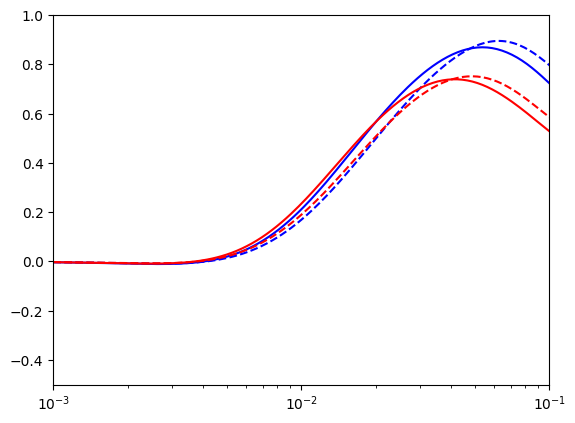

In [48]:
plt.plot(data_g5oos_low_h_pre['F'], (np.abs(data_g5oos_low_h_pre['TF'][0,:,0]) - np.abs(data_g5oos_low_h_post['TF'][0,:,0]))/np.abs(data_g5oos_low_h_pre['TF'][0,0,0]), '-b')
plt.plot(data_norm_low_h_pre['F'], (np.abs(data_norm_low_h_pre['TF'][0,:,0]) - np.abs(data_norm_low_h_post['TF'][0,:,0]))/np.abs(data_norm_low_h_pre['TF'][0,0,0]), '--b')

plt.semilogx(data_g5oos_pre['F'], (np.abs(data_g5oos_pre['TF'][0,:,0]) - np.abs(data_g5oos_post['TF'][0,:,0]))/np.abs(data_g5oos_pre['TF'][0,0,0]), '-r')
plt.semilogx(data_norm_pre['F'], (np.abs(data_norm_pre['TF'][0,:,0]) - np.abs(data_norm_post['TF'][0,:,0]))/np.abs(data_norm_pre['TF'][0,0,0]), '--r')

plt.xlim([0.001, 0.1])
plt.ylim([-0.5, 1])

In [ ]:
data_line = np.load("C:\\Users\\aless\\Desktop\\inertia step simulations\\simu_line_no_step\\_2.50\\IEEE 39 fake grid forming line_AC.npz", allow_pickle = True)
print(data_line['J'].shape)
print(data_line['var_names'].shape)
for l, val in data_line['PF_without_slack'].item()['lines'].items():
    print(l, val)

In [ ]:
data = np.load("IEEE39_stoch_CIG_tran.npz", allow_pickle = True)

In [ ]:
print(list(data.keys()))

In [ ]:
vect = data['data'].item()['gen']['s:xspeed']
time = data['time']
print(vect.shape)
print(time.shape)
print(data['H'])

In [ ]:
plt.plot(time, vect[:,7])
y_list = [1.0001, 1, 0.9999, 0.9998, 0.9997, 0.9996, 0.9995, 0.9994]
y_labels = [str(y) for y in y_list]
plt.yticks(y_list, y_labels)
plt.ylabel('generator speed normalized')
plt.title('GEN 07')
plt.xlabel('time [s]')
plt.show()

In [ ]:
(f,  pxx) = welch()